In [1]:
import PyPDF2
from PIL import Image
import pytesseract as pts
pts.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
from googletrans import Translator
import re
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## $\text{Convert Each Page to an Image}$
---

In [2]:
def pdf_to_images(pdf_file, image_prefix):
    pdf = PyPDF2.PdfReader(pdf_file)

    for page_number in range(len(pdf.pages)):
        page = pdf.pages[page_number]
        image = page_to_image(page)
        image.save(f"C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages/{image_prefix}_{page_number + 1}.png")

def page_to_image(page):
    xObject = page['/Resources']['/XObject'].get_object()
    for obj in xObject:
        if xObject[obj]['/Subtype'] == '/Image':
            img = xObject[obj]
            return Image.frombytes('RGB', [img['/Width'], img['/Height']], img.get_data())

In [3]:
pdf_file = 'Tamil Nadu.pdf'
image_prefix = 'page'
pdf_to_images(pdf_file, image_prefix)

## $\text{Extract grid of voters from all pages}$
---

In [4]:
directory = 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages'
paths = []

for filename in os.listdir(directory):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        
        file_path = os.path.join(directory, filename)
        paths.append(file_path)

# for path in image_paths:
#     print(path)

In [5]:
image_paths = [path for path in paths if not any(substring in path for substring in ['page_1.png', 'page_2.png', 'page_30.png'])]

In [6]:
image_paths

['C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_10.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_11.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_12.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_13.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_14.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_15.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_16.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_17.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_18.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_19.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_20.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_21.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_22.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_23.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Pages\\page_24.png',
 'C:/Users

In [7]:
len(image_paths)

27

In [8]:
def voters_extraction(list_of_images):
    ct = 0
    for img in list_of_images:
        image = cv2.imread(img)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #enhance for better text detection
        text = pts.image_to_string(gray)
        
        _, binary_mask = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV) #threshold-mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
        
        mask = np.zeros_like(image) #mask for large box
        
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            min_area_threshold = 1000
            if cv2.contourArea(contour) > min_area_threshold:
                cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), thickness=cv2.FILLED)
        
        
        result = cv2.bitwise_and(image, mask) #apply mask
        
        # cv2.imshow('Result with Large Rectangles', result)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        ct+=1
        
        cv2.imwrite(f'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters/voters_{ct}.png', result)


In [9]:
# voters_extraction(image_paths)

C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters/voters_1.png

In [10]:
def remove_large_black_padding(image_path, threshold=10):
    
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    horizontal_projection = np.sum(gray, axis=1)
    vertical_projection = np.sum(gray, axis=0)

    non_black_rows = np.where(horizontal_projection > threshold)[0]
    non_black_cols = np.where(vertical_projection > threshold)[0]

    if non_black_rows.size > 0 and non_black_cols.size > 0:
        top, bottom = non_black_rows[0], non_black_rows[-1]
        left, right = non_black_cols[0], non_black_cols[-1]
        cropped_img = img[top:bottom+1, left:right+1]

        return cropped_img
    else:
        return img

# example usage
# input_image_path = 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters/voters_2.png'
# output_image = remove_large_black_padding(input_image_path)

# cv2.imwrite('output_image.png', output_image)


Store the path of voters in a list

In [11]:
directory = 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters'
voter_paths = []

for filename in os.listdir(directory):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        
        file_path = os.path.join(directory, filename)
        voter_paths.append(file_path)

In [12]:
voter_paths

['C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_1.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_10.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_11.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_12.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_13.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_14.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_15.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_16.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_17.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_18.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_19.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_2.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_20.png',
 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters\\voters_21.png',
 'C:/Users/asus/Desktop/Problem 2/Ta

In [13]:
# ct = 0
# for path in voter_paths:
#     output_image = remove_large_black_padding(path)
#     ct+=1
#     cv2.imwrite(f'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters_Absolute/voter_abs_{ct}.png', output_image)

Check if the image is completely back, so as to skip it

In [14]:
def is_completely_black(pil_image):
    img_array = np.array(pil_image)
    gray = np.array(pil_image.convert('L'))
    if np.all(gray == 0):
        return True
    else:
        return False

In [15]:
folder_path = 'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters_Absolute'
files = os.listdir(folder_path)
file_count = len(files)

In [16]:
file_count

27

In [17]:
imgs = []
skip = False
ct = 0
for x in range(file_count):
    voters = Image.open(f'C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/Voters_Absolute/voter_abs_{(x+1)}.png')
    for row in range(10):
        for col in range(3):
            box = (375*col, 150*row, 375*(col+1), 150*(row+1))
            voter = voters.crop(box)
            if(is_completely_black(voter)):
                skip==True
                break
            else:
                imgs.append(voters.crop(box))
        if skip:
            break
    if skip:
        break

In [18]:
len(imgs)

706

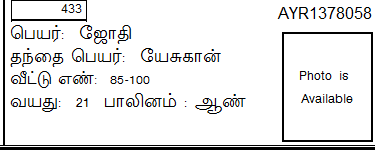

In [19]:
imgs[705]

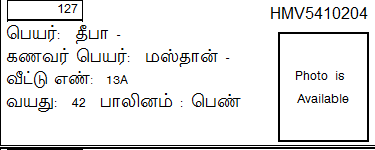

In [20]:
imgs[433]

In [21]:
def voters_to_folder(image_list, folder_name='vts'):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    for i, img in enumerate(image_list):
        filename = os.path.join(folder_name, f'{folder_name}_{i}.png')
        img.save(filename)


voters_to_folder(imgs)

In [22]:
# def has_no_text(image):
#     text = pts.image_to_string(image)
#     return not text.strip()

# def imgs_no_text(image_list):
#     no_text_indices = []
#     for i, img in enumerate(image_list):
#         if has_no_text(img):
#             no_text_indices.append(i)
#     return no_text_indices


# result_indices = imgs_no_text(imgs)

In [23]:
# len(result_indices) # should result in 11 for Tamil Nadu.pdf

In [24]:
# result_indices

In [25]:
result_indices = [112, 220, 221, 222, 223, 294, 302, 303, 304, 305, 306]

In [26]:
imgs = [imgs[i] for i in range(len(imgs)) if i not in result_indices]

print(len(imgs))


695


Total no. of voters = 695

## $\text{5 liners & 4 liners}$
---
Upon observation, there are two types of voter infos, 5 liners and 4 liners

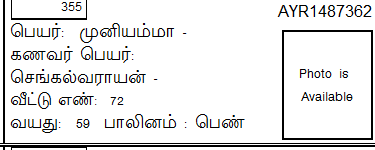

In [27]:
imgs[616]

In [28]:
print(f"Image size for 5 liners: {imgs[616].width} x {imgs[616].height}")

Image size for 5 liners: 375 x 150


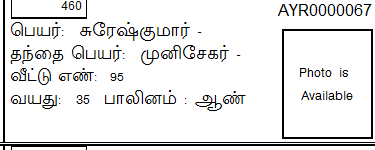

In [29]:
imgs[56]

In [30]:
print(f"Image size for 4 liners: {imgs[56].width} x {imgs[56].height}")

Image size for 4 liners: 375 x 150


Coordinates for 4 liners - `imgs[56]`

In [31]:
# bounding_box = (50, 100, 1185, 1595) # w.r.t. page
# voter_box = (0, 0, 375, 150) # w.r.t. bounding_box
# w.r.t voter_box
id_box = (250,0,375,25)  
info_box = (0,25,270,140)
age_box = (0,90,100,125)
home_box = (0, 70, 150, 95)
name_box = (0,25,270,50)
guardian_box = (0,45,250,73)
gender_box = (95, 90, 250, 125)

Coordinates for 5 liners - `imgs[616]`

In [32]:
# id_box = (250,0,375,25)  
# info_box = (0,25,270,140)
age_box_alt = (0,110,100,140)
home_box_alt = (0, 85, 150, 115)
# name_box = (0,25,270,50)
guardian_box_alt = (0,45,250,95)
gender_box_alt = (90,110,250,140)

In [33]:
liners_4 = imgs[56].crop(info_box)
liners_5 = imgs[616].crop(info_box)

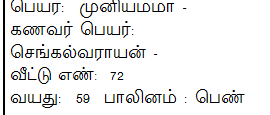

In [34]:
liners_5

In [35]:
liners_4_txt = pts.image_to_string(liners_4, lang = 'tam')
liners_5_txt = pts.image_to_string(liners_5, lang = 'tam')

In [36]:
liners_4_txt

'அபயர: சுமரஷகுமார -\nதந்\u200cைத பெயர்\u200c: முனிசேகர்\u200c -\nவீட்டு எண்\u200c: ௨\n\nவயது: % பாலினம்\u200c : ஆண்\u200c\n'

In [37]:
liners_5_txt

'அபயர: முயைமமா -\nகணவர்\u200c பெயர்\u200c:\nசெங்கல்வராயன்\u200c -\n\nவீட்டு எண்\u200c: 72\n\nவயது: ௨ பாலினம்\u200c : பெண்\u200c\n'

In [38]:
[x for x in liners_4_txt.split('\n') if x not in '']

['அபயர: சுமரஷகுமார -',
 'தந்\u200cைத பெயர்\u200c: முனிசேகர்\u200c -',
 'வீட்டு எண்\u200c: ௨',
 'வயது: % பாலினம்\u200c : ஆண்\u200c']

In [39]:
len([x for x in liners_4_txt.split('\n') if x not in ''])

4

In [40]:
translator = Translator()

Split `imgs` into `imgs_4` and `imgs_5` to seperate 4 liners and 5 liners. Keep 2 lists of them - `idx_5` & `idx_4`

In [41]:
imgs_4 = []
imgs_5 = []
imgs_misc = []
idx_4 = []
idx_5 = []
idx_misc = []

for x in range(len(imgs)):
    info_img = imgs[x].crop(info_box)
    text = pts.image_to_string(info_img, lang = 'tam')
    length = len([i for i in text.split('\n') if i not in ''])
    if length==4:
        imgs_4.append(imgs[x])
        idx_4.append(x)
    elif length==5:
        imgs_5.append(imgs[x])
        idx_5.append(x)
    else:
        imgs_misc.append(imgs[x])
        idx_misc.append(x)

In [42]:
len(imgs_4)

660

In [43]:
len(imgs_5)

35

In [44]:
len(imgs_misc)

0

In [45]:
idx_5[:10]

[11, 42, 90, 104, 117, 121, 122, 125, 131, 157]

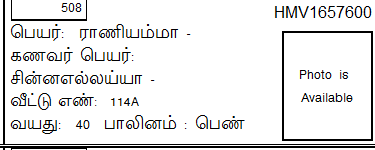

In [46]:
imgs[104]

### $\text{Functions}$

In [50]:
def extract_voter_id(image, coords):
    id_img = image.crop(coords)
    voter_id = pts.image_to_string(id_img)[:-1]
    return voter_id

def extract_voter_name(image, coords):
    name_img = image.crop(coords)
    text = pts.image_to_string(name_img, lang = 'tam')
    # text = re.sub('\u200c', '', text)
    # parts = text.split(':')
    tx = translator.translate(text, src = 'ta', dest = 'en')
    voter_name = re.sub('Name:','',tx.text).strip()
    return voter_name

def extract_voter_guardian(image, coords):
    guardian_img = image.crop(coords)
    text = pts.image_to_string(guardian_img, lang = 'tam')
    tx = translator.translate(text, src = 'ta', dest = 'en')
    voter_guardian = tx.text.split(':')[1].strip()
    return voter_guardian

def extract_voter_home(image, coords):
    home_img = image.crop(coords)
    text = pts.image_to_string(home_img, lang = 'tam')
    tx = translator.translate(text, src = 'ta', dest = 'en')
    # voter_home = re.findall(r'\b\d{2,}\b', tx.text)
    voter_home = re.findall(r'\d+', tx.text)
    return voter_home[0] if voter_home else '-'
    # return voter_age

def extract_voter_age(image, coords):
    age_img = image.crop(coords)
    # voter_age = pts.image_to_string(age_img)
    voter_age = int(re.findall(r'\d+', pts.image_to_string(age_img))[0])
    return str(voter_age)

def extract_voter_gender(image, coords):
    gender_img = image.crop(coords)
    text = pts.image_to_string(gender_img, lang = 'tam')
    tx = translator.translate(text, src = 'ta', dest = 'en')
    voter_gender = re.sub('Gender:', '', tx.text).strip()
    return voter_gender

In [51]:
def image_to_info_4(image):
    data = {}
    data['Voter ID'] = extract_voter_id(image, id_box)
    data['Name'] = extract_voter_name(image, name_box)
    data['Guardian Name'] = extract_voter_guardian(image, guardian_box)
    data['Home Number'] = extract_voter_home(image, home_box)
    data['Age'] = extract_voter_age(image, age_box)
    data['Gender'] = extract_voter_gender(image, gender_box)
    
    return data

In [52]:
def image_to_info_5(image):
    data = {}
    data['Voter ID'] = extract_voter_id(image, id_box)
    data['Name'] = extract_voter_name(image, name_box)
    data['Guardian Name'] = extract_voter_guardian(image, guardian_box_alt)
    data['Home Number'] = extract_voter_home(image, home_box_alt)
    data['Age'] = extract_voter_age(image, age_box_alt)
    data['Gender'] = extract_voter_gender(image, gender_box_alt)
    
    return data

In [70]:
image_to_info_4(imgs_4[7])

{'Voter ID': 'HMV2273506',
 'Name': '| Maramala -',
 'Guardian Name': 'Nagaraj -',
 'Home Number': '115',
 'Age': '47',
 'Gender': 'Female'}

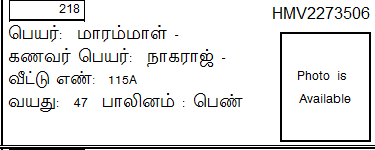

In [69]:
imgs_4[7]

In [62]:
image_to_info_5(imgs_5[12])

{'Voter ID': 'AYR1470020',
 'Name': 'Yara: Death -',
 'Guardian Name': 'Krishnamurthy -',
 'Home Number': '124',
 'Age': '47',
 'Gender': 'Female'}

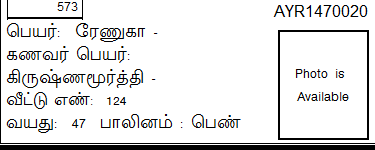

In [63]:
imgs_5[12]

In [57]:
df_master = pd.DataFrame()

In [71]:
len(imgs_4)

660

In [73]:
fl_4 = 0
for img in imgs_4:
    try:
        record = image_to_info_4(img)
    except Exception as e:
        fl_4+=1
        continue
    df_master = df_master.append(record, ignore_index=True)

In [74]:
fl_4

42

In [75]:
len(imgs_5)

35

In [76]:
fl_5 = 0
for img in imgs_5:
    try:
        record = image_to_info_5(img)
    except Exception as e:
        fl_5+=1
        continue
    df_master = df_master.append(record, ignore_index=True)

In [77]:
fl_5

13

In [78]:
df_master

,Voter ID,Name,Guardian Name,Home Number,Age,Gender
0,"HMV2271849,",Sulochana -,Sannyasi -,௨,30,Female
1,AYR1092220,Vishnupriya -,Suniwel -,72,35,Female
2,HMV5303193,Sukuna -,Manohar ..,75,38,Female
3,HMV2271740,Chengammal -,Nagaraj -,74,37,Female
4,HMV2277150,Raman -,Ravanan -,74,37,Male
...,...,...,...,...,...,...
635,AYR1486570,Devaki -,Chengalvarayan -,456,71,Female
636,AYR1486679,Abayara: Shiva\n\n£ -,Sesharama\nSessual,18௩,44,Male
637,HMV2277879,Annamammal -,Thundamudaliyar -,2,75,Female
638,AYR2308120,Sorna,Brick,௭,26,Female


In [80]:
df_master.iloc[636]

Voter ID                    AYR1486679
Name             Abayara: Shiva\n\n£ -
Guardian Name       Sesharama\nSessual
Home Number                        18௩
Age                                 44
Gender                            Male
Name: 636, dtype: object

In [81]:
640/695 * 100

92.08633093525181

In [83]:
df_master.to_csv('C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/df_master_raw.csv', index = False, header = True)

In [118]:
df_master = pd.read_csv('df_master_raw.csv')

In [119]:
df_master.dtypes

Voter ID         object
Name             object
Guardian Name    object
Home Number      object
Age               int64
Gender           object
dtype: object

In [120]:
df_master = df_master.astype(str)

In [121]:
df_master['Voter ID'] = df_master['Voter ID'].apply(lambda x: ''.join(filter(str.isalnum, x)))
df_master['Name'] = df_master['Name'].apply(lambda x: ''.join(filter(str.isalnum, x)))
df_master['Guardian Name'] = df_master['Guardian Name'].apply(lambda x: ''.join(filter(str.isalpha, x)))
df_master['Home Number'] = df_master['Home Number'].apply(lambda x: ''.join(re.findall(r'\d+', str(x))))

In [122]:
df_master.head()

,Voter ID,Name,Guardian Name,Home Number,Age,Gender
0,HMV2271849,Sulochana,Sannyasi,௨,30,Female
1,AYR1092220,Vishnupriya,Suniwel,72,35,Female
2,HMV5303193,Sukuna,Manohar,75,38,Female
3,HMV2271740,Chengammal,Nagaraj,74,37,Female
4,HMV2277150,Raman,Ravanan,74,37,Male


In [123]:
df_master.to_csv('C:/Users/asus/Desktop/Problem 2/Tamil_Nadu/df_master_clean.csv', index = False, header = True)

In [126]:
print(f'Retention Rate: {(len(df_master)/len(imgs) * 100)}')

Retention Rate: 92.08633093525181
